In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

In [2]:
file_path = "../exports/cms_unified_2024.csv"
df = pd.read_csv(file_path, low_memory=False, parse_dates=["date_of_payment"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655386 entries, 0 to 655385
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   covered_recipient_profile_id                                   655386 non-null  int64         
 1   covered_recipient_npi                                          655386 non-null  int64         
 2   covered_recipient_first_name                                   655380 non-null  object        
 3   covered_recipient_last_name                                    655373 non-null  object        
 4   recipient_city                                                 655386 non-null  object        
 5   recipient_state                                                655343 non-null  object        
 6   applicable_manufacturer_or_applicable_gpo_making_payment_id    655386 non-null  int6

In [4]:
df.sample(20)

,covered_recipient_profile_id,covered_recipient_npi,covered_recipient_first_name,covered_recipient_last_name,recipient_city,recipient_state,applicable_manufacturer_or_applicable_gpo_making_payment_id,applicable_manufacturer_or_applicable_gpo_making_payment_name,name_of_drug_or_biological_or_device_or_medical_supply_1,total_amount_of_payment_usdollars,date_of_payment,record_id,program_year,transaction_type
487212,1153379,1740410463,Marcjonathan,Serota,Littleton,CO,100000000073,"UCB, Inc.",Bimzelx,1725.00,2024-09-12,1143157981,2024,general
149958,2784926,1841427721,Miguel,Mascaro,Brooklyn,NY,100000000204,ABBVIE INC.,NaN,48.00,2024-09-06,1104978823,2024,general
82482,4221178,1588928378,Bhavraj,Khalsa,Orange,CA,100000005674,Boston Scientific Corporation,NaN,500.00,2024-09-12,1092721020,2024,general
90427,328654,1245203371,Alan,Cohen,Memphis,TN,100000000144,Novo Nordisk Inc,Ozempic,938.00,2024-08-09,1096567682,2024,general
138569,2785587,1811315674,Roxana,Ghashghaei,Laguna Hills,CA,100000000146,AstraZeneca Pharmaceuticals LP,WAINUA,100.00,2024-10-01,1104721259,2024,general
216421,944046,1407086325,Nader,Kassis Akl,Lansing,MI,100000151639,"OPKO Pharmaceuticals, LLC",RAYALDEE,20.45,2024-01-26,1112845958,2024,general
166777,710325,1174542534,Kim,Luu,Milpitas,CA,100000005689,Straumann USA LLC,NaN,70.15,2024-02-20,1106594025,2024,general
112571,308705,1801092705,Inderjit,Mehmi,Los Angeles,CA,100001176930,Immunocore Limited,KIMMTRAK,400.00,2024-06-20,1103098523,2024,general
268750,114872,1538333893,David,Forsh,New York,NY,100000010503,Stryker Corporation,NaN,13275.00,2024-09-13,1119829886,2024,general
269259,29980,1659509214,Melissa,Galli,Phoenix,AZ,100000010503,Stryker Corporation,AUGMENT INJECTABLE,1200.00,2024-07-01,1119833166,2024,general


In [5]:
df[df["covered_recipient_npi"] == 1942535489].groupby("covered_recipient_npi")["total_amount_of_payment_usdollars"].sum().reset_index()

,covered_recipient_npi,total_amount_of_payment_usdollars
0,1942535489,161966.49


In [6]:
df[df["covered_recipient_npi"] == 1942535489].groupby("covered_recipient_npi").agg(
    total_payment=("total_amount_of_payment_usdollars", "sum"), 
    avg_payment=("total_amount_of_payment_usdollars", "mean"),
    num_payment=("total_amount_of_payment_usdollars", "count")
)

,total_payment,avg_payment,num_payment
covered_recipient_npi,,,
1942535489,161966.49,2131.138026,76


In [7]:
df.sort_values(["total_amount_of_payment_usdollars"], ascending=False)

,covered_recipient_profile_id,covered_recipient_npi,covered_recipient_first_name,covered_recipient_last_name,recipient_city,recipient_state,applicable_manufacturer_or_applicable_gpo_making_payment_id,applicable_manufacturer_or_applicable_gpo_making_payment_name,name_of_drug_or_biological_or_device_or_medical_supply_1,total_amount_of_payment_usdollars,date_of_payment,record_id,program_year,transaction_type
528394,288926,1366487498,Stephen,Burkhart,San Antonio,TX,100000005371,"Arthrex, Inc.",Arthrex,9150084.07,2024-02-15,1146527311,2024,general
502705,169552,1740392901,Daniel,Schwartz,San Francisco,CA,100000676811,RxSight Inc,RXSIGHT CONTACT LENS,6791927.77,2024-01-16,1144227720,2024,general
528393,288926,1366487498,Stephen,Burkhart,San Antonio,TX,100000005371,"Arthrex, Inc.",Arthrex,4979982.21,2024-05-15,1146527307,2024,general
593117,105583,1336247469,Ivan,Osorio,Kansas City,KS,100000176739,"LivaNova USA, Inc.",VNS THERAPY SENTIVA MODEL 1000 GENERATOR,4494860.91,2024-07-30,1152786953,2024,general
593119,105583,1336247469,Ivan,Osorio,Kansas City,KS,100000176739,"LivaNova USA, Inc.",VNS THERAPY SENTIVA MODEL 1000 GENERATOR,4417383.49,2024-10-30,1152786957,2024,general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533185,330185,1265510416,Thomas,Stinchcombe,Chapel Hill,NC,100000981882,Acrotech Biopharma Inc.,NaN,0.01,2024-12-09,1147106244,2024,general
547121,11190367,1154819035,Kathryn,Ellens,Grand Rapids,MI,100001111886,"Axsome Therapeutics, Inc.",Sunosi,0.01,2024-06-10,1148375926,2024,general
543861,325117,1164431904,Robert,Hamilton,Normal,IL,100001111886,"Axsome Therapeutics, Inc.",Sunosi,0.01,2024-05-16,1148315966,2024,general
543658,145009,1194702100,Phone,Win,Monticello,NY,100001111886,"Axsome Therapeutics, Inc.",Sunosi,0.01,2024-05-07,1148311328,2024,general


In [8]:
df[df["covered_recipient_npi"] == 1366487498].groupby("covered_recipient_npi").agg(
    total_payment=("total_amount_of_payment_usdollars", "sum"), 
    avg_payment=("total_amount_of_payment_usdollars", "mean"),
    num_payment=("total_amount_of_payment_usdollars", "count")
)

,total_payment,avg_payment,num_payment
covered_recipient_npi,,,
1366487498,17332176.23,5.777392e+06,3


In [9]:
df.groupby(["recipient_state"]).size().reset_index(name="count").sort_values("count", ascending=False).head(10)

,recipient_state,count
6,CA,71955
47,TX,55711
11,FL,51461
37,NY,49306
41,PA,29435
17,IL,28324
38,OH,26687
30,NC,22450
12,GA,20857
25,MI,20591


In [10]:
df.groupby(["transaction_type"]).size().reset_index(name="count").sort_values("count", ascending=False)

,transaction_type,count
0,general,628035
1,research,27351


In [11]:
df.groupby(["applicable_manufacturer_or_applicable_gpo_making_payment_name"]).size().reset_index(name="count").sort_values("count", ascending=False)

,applicable_manufacturer_or_applicable_gpo_making_payment_name,count
8,ABBVIE INC.,47516
762,"Lilly USA, LLC",23345
624,"INTUITIVE SURGICAL, INC.",22220
137,AstraZeneca Pharmaceuticals LP,20647
684,"Janssen Biotech, Inc.",19157
...,...,...
1377,"VisionAir Solutions, LLC",1
1378,"VisionRT, Inc.",1
1384,VoxNeuro USA Inc.,1
3,3Shape A/S,1


In [12]:
df.sample(10)

,covered_recipient_profile_id,covered_recipient_npi,covered_recipient_first_name,covered_recipient_last_name,recipient_city,recipient_state,applicable_manufacturer_or_applicable_gpo_making_payment_id,applicable_manufacturer_or_applicable_gpo_making_payment_name,name_of_drug_or_biological_or_device_or_medical_supply_1,total_amount_of_payment_usdollars,date_of_payment,record_id,program_year,transaction_type
203896,11300308,1467983007,Emma,Hegwood,Indianapolis,IN,100000000106,"Medtronic, Inc.",NaN,3083.33,2024-07-15,1112069500,2024,general
376428,1236351,1679533434,Barbara,Hirsch,Manhasset,NY,100000000066,"Lilly USA, LLC",MOUNJARO,1800.00,2024-01-25,1136061790,2024,general
397803,144796,1205089463,Cheguevara,Afaneh,New York,NY,100000005384,"INTUITIVE SURGICAL, INC.",Da Vinci Surgical System,500.00,2024-04-12,1137203836,2024,general
208580,280044,1174781587,Chris,Karas,Columbus,OH,100000000106,"Medtronic, Inc.",INTELLIS ADAPTIVESTIM,2700.00,2024-12-10,1112049684,2024,general
594920,1311720,1679893010,Markey,Mcnutt,Dallas,TX,100000191753,"PTC Therapeutics, Inc.",NaN,2500.00,2024-05-14,1152941636,2024,general
429938,89647,1972503993,John,Kitchens,Lexington,KY,100000000137,Astellas Pharma US Inc,Izervay,2200.00,2024-04-02,1139450122,2024,general
331700,219683,1851468813,Dennis,Fasbinder,Ann Arbor,MI,100000010673,DENTSPLY LLC,CEREC Optispray,175.12,2024-01-19,1132745625,2024,general
208055,1256116,1376540807,Eugene,Fu,Columbus,OH,100000000106,"Medtronic, Inc.",NaN,2800.00,2024-09-05,1112053804,2024,general
565342,74639,1639387418,Neil,Mushlin,Lansdale,PA,100000005637,JAZZ PHARMACEUTICALS INC.,XYWAV,3010.00,2024-11-21,1150224720,2024,general
167507,1579727,1568758951,Ehsan,Jazini,Reston,VA,100000196843,"Stability Biologics, LLC",NaN,4500.00,2024-01-29,1106655304,2024,general


In [ ]:
# MOST PAID
grouped = df.groupby("covered_recipient_npi").agg(
    full_name = ("covered_recipient_first_name", "first"),
    last_name = ("covered_recipient_last_name", "first"),
    state = ("recipient_state", "first"),
    total_payments = ("total_amount_of_payment_usdollars", "sum") 
)

grouped["full_name"] = grouped["full_name"] + " " + grouped["last_name"]
grouped = grouped.drop(columns=["last_name"])

# NOT IDEAL WAY
# top_10 = grouped.sort_values("total_payments", ascending=False)
# top_10.head(10)

top_10 = grouped.nlargest(10, "total_payments")

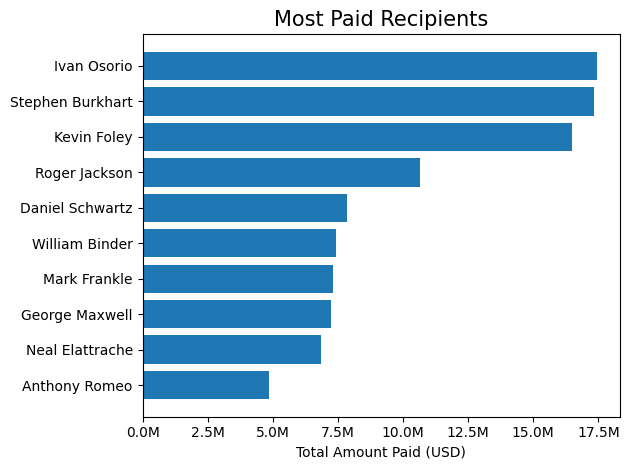

In [27]:
plt.barh(top_10["full_name"], top_10["total_payments"])
plt.gca().invert_yaxis()

plt.title("Most Paid Recipients", fontsize=15)
plt.xlabel("Total Amount Paid (USD)")
plt.ticklabel_format(style="plain", axis="x")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1_000_000:.1f}M"))
plt.tight_layout()

plt.show()

In [ ]:
# MOST PAID OVER TIME
top_ot = df[(df["covered_recipient_first_name"] == "Ivan") & (df["covered_recipient_last_name"] == "Osorio")].sort_values("date_of_payment")
top_ot["rolling"] = top_ot["total_amount_of_payment_usdollars"].cumsum()
top_ot

,covered_recipient_profile_id,covered_recipient_npi,covered_recipient_first_name,covered_recipient_last_name,recipient_city,recipient_state,applicable_manufacturer_or_applicable_gpo_making_payment_id,applicable_manufacturer_or_applicable_gpo_making_payment_name,name_of_drug_or_biological_or_device_or_medical_supply_1,total_amount_of_payment_usdollars,date_of_payment,record_id,program_year,transaction_type,rolling
207044,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",CD HORIZON SPINAL SYSTEM,962.5,2024-01-10,1112038794,2024,general,962.5
204366,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",PIVOX OBLIQUE LATERAL SPINAL SYSTEM,248972.0,2024-02-01,1112033075,2024,general,249934.5
204365,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",METRX SYSTEM,388170.0,2024-02-01,1112033073,2024,general,638104.5
204364,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",ELEVATE SPINAL SYSTEM,177313.0,2024-02-01,1112033071,2024,general,815417.5
204237,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",CD HORIZON SPINAL SYSTEM,2785591.0,2024-02-01,1112033063,2024,general,3601008.5
204239,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",DIVERGENCE ANTERIOR CERVICAL FUSION SYSTEM,101665.0,2024-02-01,1112033067,2024,general,3702673.5
204238,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",ANATOMIC PEEK PTC CERVICAL FUSION SYSTEM,205638.0,2024-02-01,1112033065,2024,general,3908311.5
204363,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",CAPSTONE PTC SPINAL SYSTEM,289405.0,2024-02-01,1112033069,2024,general,4197716.5
207045,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",CD HORIZON SPINAL SYSTEM,1925.0,2024-04-01,1112038796,2024,general,4199641.5
207046,311622,1861451874,Kevin,Foley,Memphis,TN,100000000106,"Medtronic, Inc.",CD HORIZON SPINAL SYSTEM,770.0,2024-04-16,1112038798,2024,general,4200411.5


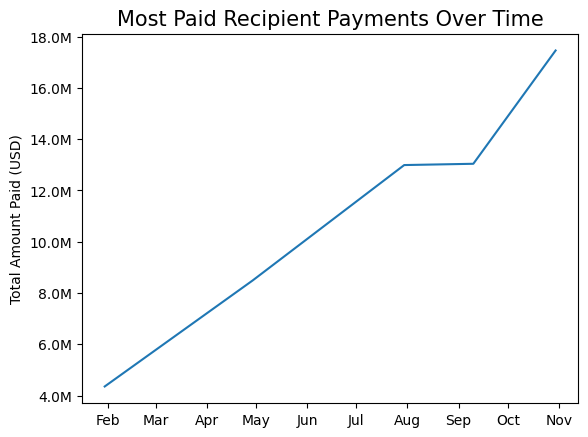

In [49]:
dates = top_ot["date_of_payment"]
paid = top_ot["rolling"]

plt.title("Most Paid Recipient Payments Over Time", fontsize=15)
plt.ylabel("Total Amount Paid (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1_000_000:.1f}M"))
plt.plot(dates, paid)

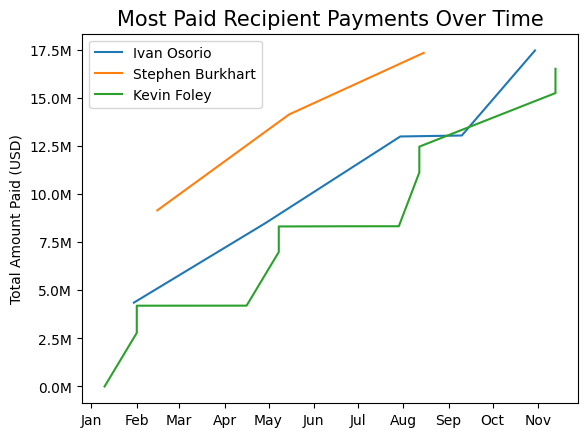

In [63]:
rolled = df.sort_values(["covered_recipient_npi", "date_of_payment"])
rolled["rolling"] = rolled.groupby(["covered_recipient_npi"])["total_amount_of_payment_usdollars"].cumsum()
top_ot = rolled.groupby(["covered_recipient_npi"])["total_amount_of_payment_usdollars"].sum().nlargest(3).index

# FILTERED TO ONLY TOP 5 PAID
top_df = rolled[rolled["covered_recipient_npi"].isin(top_ot)]

plt.title("Most Paid Recipient Payments Over Time", fontsize=15)
plt.ylabel("Total Amount Paid (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1_000_000:.1f}M"))

# PROBABLY SHOULD HAVE JUST MADE A NEW COLUMN
for npi, group in top_df.groupby("covered_recipient_npi"):
    full_name = group["covered_recipient_first_name"].iloc[0] + " " + group["covered_recipient_last_name"].iloc[0]
    plt.plot(group["date_of_payment"], group["rolling"], label=full_name)

plt.legend()
